## Код 01. Количество торговых дней.ipynb (Таблица 2)

In [2]:
# подготовка библиотек 
import pandas as pd

# функция, которая выводит номер начала и конца срезов таблицы соответствующие периоду одного полугодия
def half_year(df, year, half=1):
    ''' 
    df - датасет, в котором ищутся номера строк
    year - год, по которому нужны данные
    если half = 1 ищутся индексы строк первой половины нужного года, 
    если half = 2 ищутся индексы строк второй половины нужного года
    функция выводит номер начала и конца нужного среза таблицы 
    (из-за особенностей pandas фактический конец среза на единицу меньше конца, который выводится тут)
    '''
    start, end, count = 0, 0, 0
    for i in df['Date']:
        if half == 1:
            if int(i[:4]) == year and (int(i[5:7]) < 7) and start == 0:
                start = count
            if int(i[:4]) == year and (int(i[5:7]) > 6) and end == 0:
                end = count
                break # для сокращения времени работы функции
            count += 1
        elif half == 2:
            if int(i[:4]) == year and (int(i[5:7]) > 6) and start == 0:
                start = count
            if int(i[:4]) == year+1 and end == 0:
                end = count
                break 
            count += 1
    if start != 0 and end == 0:
        end = count
    return start, end

# функция, которая выводит номер начала и конца срезов таблицы соответствующие периоду одного квартала
def quartal(df, year, quart=1):
    ''' 
    df - датасет, в котором ищутся номера строк
    year - год, по которому нужны данные
    если quart = 1 ищутся индексы строк первого квартала нужного года, 
    если quart = 2 ищутся индексы строк второго квартала нужного года,
    если quart = 3 ищутся индексы строк третьего квартала нужного года,
    если quart = 4 ищутся индексы строк четвертого квартала нужного года,
    функция выводит номер начала и конца нужного среза таблицы 
    (из-за особенностей pandas фактический конец среза на единицу меньше конца, который выводится тут)
    '''
    start, end, count = 0, 0, 0
    for i in df['Date']:
        if quart == 1:
            if int(i[:4]) == year and (int(i[5:7]) < 4) and start == 0:
                start = count
            if int(i[:4]) == year and (int(i[5:7]) > 3) and end == 0:
                end = count
                break # для сокращения времени работы функции
            count += 1
        elif quart == 2:
            if int(i[:4]) == year and (7 > int(i[5:7]) > 3) and start == 0:
                start = count
            if int(i[:4]) == year and (10 > int(i[5:7]) > 6) and end == 0:
                end = count
                break 
            count += 1
        elif quart == 3:
            if int(i[:4]) == year and (10 > int(i[5:7]) > 6) and start == 0:
                start = count
            if int(i[:4]) == year and (int(i[5:7]) > 9) and end == 0:
                end = count
                break 
            count += 1
        elif quart == 4:
            if int(i[:4]) == year and (int(i[5:7]) > 9) and start == 0:
                start = count
            if int(i[:4]) == year+1 and end == 0:
                end = count
                break 
            count += 1
    if start != 0 and end == 0:
        end = count

    return start, end

# функция, которая выводит номер начала и конца срезов таблицы при помощи предыдущих функций
def Rows(file, year=False, half=False, quart=False):
    ''' 
    file - файл, из которого берется датасет
    year - год, по которому нужны данные 
    half - полугодие в году, по которому нужны данные
    quart - квартал в году, по которому нужны данные
    функция выводит номер начала и конца нужного среза таблицы 
    (из-за особенностей pandas фактический конец среза на единицу меньше конца, который выводится тут)
    '''
    
    # считывание данных из csv файла в таблицу
    df = pd.read_csv(file)
    
    '''
    start - начало среза
    end - конец среза +1
    count - счетчик строк
    
    '''
    
    start, end, count = 0, 0, 0
    #если не нужно извлекать полугодие, квартал или пятилетку, то находятся индексы для периода 1 год
    if not half and not quart:
        for i in df['Date']:
            if int(i[:4]) == year and start == 0:
                start = count
            if int(i[:4]) == year+1 and end == 0:
                end = count
                break # для сокращения времени работы функции
            count += 1
        # если все строки были проверены, но end не стал каким-то значение, то end - последняя строка таблицы
        if start != 0 and end == 0:
            end = count
    # если нужно извлечь полугодие, то запускается функция half_year
    elif half:
        start, end = half_year(df, year, half)
    # если нужно извлечь квартал, то запускается функция quartal
    elif quart:
        start, end = quartal(df, year, quart)
    # частный случай, который учитывается для дальнейшей работы в других функциях
    if start == 1:
        start = 0
    return start, end

# Функция, которая считает количество торговых дней в определенном году
def Num_of_days(file, year, half_year=False, quart=False):
    # считывание данных из csv файла в таблицу
    df = pd.read_csv(file)
    # при помощи функции Rows находим строку начала и конца определенного году в таблицу
    start, end = Rows(file, year, half_year, quart)
    if start == end:
        return 0
    else:
        # так как из-за особенности pandas end = конец периода в таблице + 1, то просто вычитаем из end start
        return end-start


years = range(2010, 2021)
# создаем пустую таблицу с заголовками годами
df = pd.DataFrame(columns=years)
# список тикеров
TICK = ['AAPL', 'AMZN', 'CSCO', 'INTC', 'MCD', 'NKE', 'FDX', 'PG', 'V',
        'DIS', 'FB', 'GOOG', 'NFLX', 'MSFT', 'IBM', 'KO', 'TSLA', 'PFE']
for j in TICK:
    # создание путя к файлу 
    file = f'.\\ТИКЕРЫ\\{j}.csv'
    l = [] # список количества торговых дней во все года для определенного тикера
    for i in years:
        l.append(Num_of_days(file, i))
    # запись этого списка в таблицу с индексом рассматриваемого тикера
    df.loc[j] = l

# сохранение таблицы в csv файл
df.to_csv('.\\ResultWork\\Num_Of_Days.csv', sep=';')

## Код 02. Максимальные скачки цены.ipynb (Таблица 3, 4)

In [14]:
# подготовка библиотек 
import pandas as pd

# функция, которая высчитывает максимальные скачки цены вверх (в процентах)
def Cost_year(file, year):
    # считывание данных из csv файла в таблицу
    df = pd.read_csv(file)
    #добавление столбца, в который записываются скачки цен в процентах по всей таблице
    df['dif'] = (df['Close']-df['Open'])/df['Open']*100
    # получение позиций среза с помощью функции Rows (см. выше) 
    start, end = Rows(file, year)
    # выводит округленное до двух знаков после запятой максимальное/минимальное значение за определенный год при помощи среза таблицы 
    return round(max(df['dif'][start:end]), 2), round(min(df['dif'][start:end]), 2)


years = range(2010, 2021)
# создаем пустую таблицу с заголовками годами
df = pd.DataFrame(columns=years)
# список тикеров
TICK = ['AAPL', 'AMZN', 'CSCO', 'INTC', 'MCD', 'NKE', 'FDX',
        'PG', 'V', 'DIS', 'GOOG', 'NFLX', 'MSFT', 'IBM', 'KO', 'PFE']
for j in TICK:
    # создание путя к файлу 
    file = f'.\\ТИКЕРЫ\\{j}.csv'
    l = [] # список максимальных скачков цены вверх (в процентах) во все года для определенного тикера
    for i in years:
        l.append(Cost_year(file, i)[0])
    # запись этого списка в таблицу с индексом рассматриваемого тикера
    df.loc[j] = l

# добавления столбца максимумов значений по строкам таблицы
df['Max'] = df[range(2010, 2021)].max(axis=1)

# сохранение таблицы в csv файл
df.to_csv('.\\ResultWork\\Max_Up.csv')

#аналогичные дейтсвия для таблицы максимальных скачков вниз
df = pd.DataFrame(columns=years)

for j in TICK:
    # создание путя к файлу 
    file = f'.\\ТИКЕРЫ\\{j}.csv'
    l = [] # список максимальных скачков цены вниз (в процентах) во все года для определенного тикера
    for i in years:
        l.append(Cost_year(file, i)[1])
    # запись этого списка в таблицу с индексом рассматриваемого тикера
    df.loc[j] = l

# добавления столбца максимумов значений по строкам таблицы
df['Min'] = df[range(2010, 2021)].min(axis=1)

# сохранение таблицы в csv файл
df.to_csv('.\\ResultWork\\Max_Down.csv')

## Код 03. Графики цен.ipynb (Рисунок 1, 2)

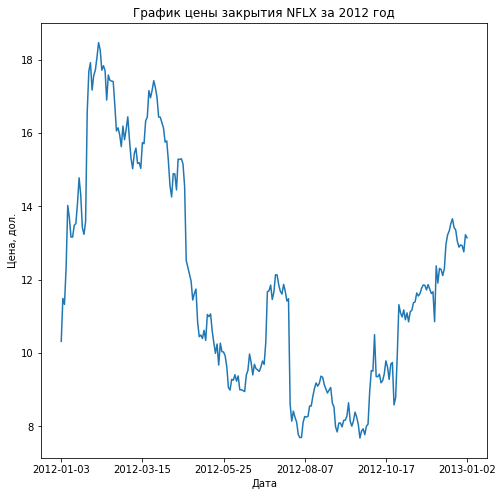

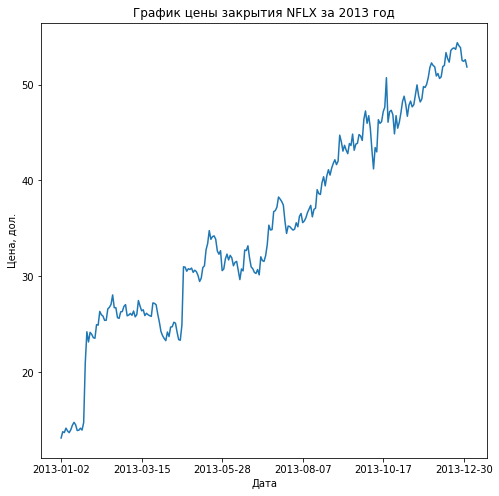

In [15]:
# подготовка библиотек 
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import pandas as pd

# функция, которая возвращает массив цен и дат (таблицу) за нужный период
def Prices(file, year, half_year=False, quart=False):
    # считывание данных из csv файла в таблицу
    df = pd.read_csv(file)
    # получение позиций среза с помощью функции Rows (см. выше) 
    start, end = Rows(file, year, half_year, quart)
    return df.loc[start:end, 'Date':'Close']


# нужный тикер и  год
stock = 'NFLX'
year = 2012

# создание путя к файлу 
file = f'.\\ТИКЕРЫ\\{stock}.csv'

fig, ax = plt.subplots(figsize=(8, 8))

# создание графика цен за нужный год при помощи функции Prices
price = Prices(file, year)
# по оси икс - даты, по оси игрек - цены
ax.plot(price['Date'], price['Close'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax.set_title(f'График цены закрытия {stock} за {year} год')
plt.xlabel('Дата')
plt.ylabel('Цена, дол.')
# сохранение графика в формате png
plt.savefig('.\\ResultWork\\Max_Up_Stock.png')

# нужный тикер и  год
stock = 'NFLX'
year = 2013

# создание путя к файлу 
file = f'.\\ТИКЕРЫ\\{stock}.csv'

fig, ax = plt.subplots(figsize=(8, 8))
# создание графика цен за нужный год при помощи функции Prices
price = Prices(file, year)
# по оси икс - даты, по оси игрек - цены
ax.plot(price['Date'], price['Close'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(50))
ax.set_title(f'График цены закрытия {stock} за {year} год')
plt.xlabel('Дата')
plt.ylabel('Цена, дол.')
# сохранение графика в формате png
plt.savefig('.\\ResultWork\\Max_Down_Stock.png')

## Код 04. Модельные данные.ipynb (Таблица 5)

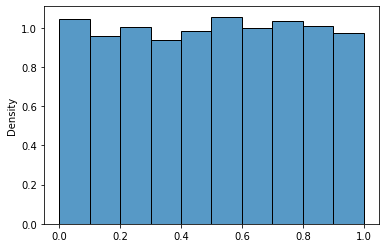

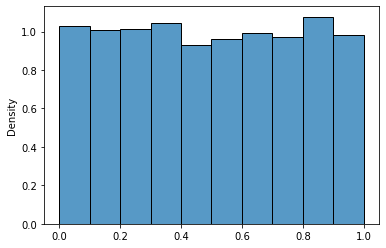

In [22]:
# подготовка библиотек 
from math import sqrt, log, log2, isnan
import scipy.stats as sts
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# функция, которая осуществляет оценку параметров θ1 и θ2 (мат.ожидание и дисперсию) сгенерированной рандомной выборки
def ozenka_tetta(Data):
    # упорядочивает сгенерированную выборку
    Data = sorted(Data)
    n = len(Data)
    m = 1+int(log2(n))  # по формуле Стерджесса расчитывает количество интервалов разбиения выборки
    h = (max(Data)-min(Data))/m #шаг разбиения 
    eps = [min(Data)] # список который будет собирать центральны точки отрезков разбиения (первая точка в разбиении - минимум выборки)

    Razb = [] # список, который будет собирать разбитые на отрезки данные 
    Razb.append([x for x in Data if x < eps[-1]+h/2])
    for i in range(2, m):
        eps.append(eps[0]+(i-1)*h)
        Razb.append([x for x in Data if eps[-1]-0.5*h < x < eps[-1]+0.5*h])

    eps.append(eps[0]+(m-1)*h)
    Razb.append([x for x in Data if x > eps[-1]-0.5*h])

    # список частот (количество элементов в интервалах)
    V = [len(x) for x in Razb]

    m = [] # список значений, которые будут суммировать для получения θ1
    for i in range(len(V)):
        m.append(V[i]*eps[i])
    m_ = 1/n*sum(m) # высчитывает θ1 по формуле 

    s = [] # список значений, которые будут суммировать для получения θ2
    for i in range(len(V)):
        s.append(V[i]*(eps[i]-m_)**2)
    sigma_ = 1/n*sum(s) # высчитывает θ2 по формуле 
    
    # выводим θ1, θ2, список частот, список центральных точек отрезков разбиений
    return m_, sigma_, V, eps

def Pirsons(per):
    n = per
    # генерация нормальной выборки 
    Data = sts.norm(0, 1).rvs(n)
    m = 1+int(log2(n))  # по формуле Стерджесса расчитывает количество интервалов разбиения выборки
    h = (max(Data)-min(Data))/m # шаг разбиения 
    func = ozenka_tetta(Data) # получение нужный данных при помощи функции ozenka_tetta
    m, sigma, eps, V = func[0], func[1], func[3], func[2] # считывание необходимых данных для критерия Пирсона
    Exp = sts.norm(m, sqrt(sigma)) # ожидаемое распределение (то, с которой будем сравнивать рандомную выборку)
    # формирование списка вероятностей попадания в интервалы разбиения
    P = [Exp.cdf(eps[0]+0.5*h)]
    P += [Exp.cdf(eps[x]+0.5*h)-Exp.cdf(eps[x]-0.5*h)
          for x in range(1, len(eps)-1)]
    P += [1-Exp.cdf(eps[-1]-0.5*h)]
    
    # высчитываем статистику критерия Пирсона
    Z = []
    for i in range(len(P)):
        Z.append(((V[i]-n*P[i])**2)/(n*P[i]))
    chi_2 = sum(Z)
    pvalue = (sts.chi2(len(V)-3).sf(chi_2))
    # возвращаем статистику критерия Пирсона и p-value
    return chi_2, pvalue


N = 10000 # количество значений статистики 

# Словарь разных объемов выборки, соответствующие разным временным интервалам
periods = {'квартал': 63, 'полугодие': 126, 'год': 252}
# создание пустых таблицы для 9 и 999 квантилей 
df_9, df_999 = pd.DataFrame(), pd.DataFrame()

# заполняем таблицы перебором всех возможных объемов выборки
for i, j in periods.items():
    # вычисление 10 000 значений статистики 
    pirs = [Pirsons(j) for _ in range(N)]
    
    # списки значений статистики и p-value
    chi2, pv_pirs = [x[0] for x in pirs], [x[1] for x in pirs]
    
    # вычисление 9 и 999 квантилей 
    chi2_q999 = np.quantile(chi2, np.arange(0.001, 1, 0.001))
    chi2_q9 = np.quantile(chi2, np.arange(0.1, 1, 0.1))
    
    # вычисление 999 p-value для постоения гистограммы  
    pv_q999 = np.quantile(pv_pirs, np.arange(0.001, 1, 0.001))
    
    # запись в таблицы округленных значений
    df_9[i] = np.round(chi2_q9,7)
    df_999[i] = np.round(chi2_q999,7)

# изменение значений индексов строк в таблицах
ind = [round(i, 1) for i in list(np.arange(0.1, 1, 0.1))]
df_9.index = ind
ind = [round(i, 3) for i in list(np.arange(0.001, 1, 0.001))]
df_999.index = ind

# сохранение таблиц в csv файлы
df_9.to_csv('.\\ResultWork\\Quant_9.csv', sep=';', encoding='cp1251')
df_999.to_csv('.\\ResultWork\\Quant_999.csv', sep=';', encoding='cp1251')


n = 252

chi2 = [Pirsons(n)[0] for _ in range(N)]
chi2_q999 = np.quantile(chi2, np.arange(0.001, 1, 0.001))

# список p-value критерия Пирсона вручную вычисленных вручную
pvalue_pirs = []
for _ in range(N):
    u0 = Pirsons(n)[0]
    k = 0
    for i in range(len(chi2_q999)):
        if chi2_q999[i] > u0:
            k += 1      
    pvalue_pirs.append(k/len(chi2_q999)) #p-value критерия Пирсона вручную

# список p-value критерия Колмогорова - Смирнова
pvalue_ks = []
n=250
for _ in range(N):
    Data = sts.norm(0, 1).rvs(n)
    pvalue_ks.append(sts.kstest(Data,'norm')[1]) #p-value критерия Колмогорова - Смирнова

sns.histplot(pvalue_ks,bins=10,stat='density')
plt.savefig(".\\ResultWork\\Kolmogorov-Smornov_test.png")
plt.show()
sns.histplot(pvalue_pirs,bins=10,stat='density')
plt.savefig(".\\ResultWork\\Pirsons_test.png")

# проверка, что распределения p-значений идентичны
pvalue = sts.ks_2samp(pvalue_ks,pvalue_pirs)

## Код 05. Мощность критерия и распределение Стьюдента.ipynb (Таблица 6, 7, 8, 9, 10)


In [17]:
# подготовка библиотек 
from math import sqrt, log, log2, isnan
import scipy.stats as sts
import pandas as pd


N = 10000 # количество значений статистики 

# Словарь разных объемов выборки, соответствующие разным временным интервалам
periods = {'квартал': 63, 'полугодие': 126, 'год': 252}

st = [1,2,3,5,15] # количество степеней свободы

for stepen in st:
    # создание пустой таблицы для записи значений мощности критерия
    pv = pd.DataFrame(columns=list(periods.keys()))

    for l, n in periods.items():
        pvalue = [] #список p-value критерия Пирсона
        for _ in range(N):
            # генерируем выборку нужного объема распределения Стьюдента
            Data = sts.t(stepen).rvs(n)

            # данный кусок кода поясняется выше 
            m = 1+int(log2(n))  
            h = (max(Data)-min(Data))/m
            func = ozenka_tetta(Data)
            m, sigma, eps, V = func[0], func[1], func[3], func[2]
            Exp = sts.norm(m, sqrt(sigma))
            P = [Exp.cdf(eps[0]+0.5*h)]
            P += [Exp.cdf(eps[x]+0.5*h)-Exp.cdf(eps[x]-0.5*h) for x in range(1, len(eps)-1)]
            P += [1-Exp.cdf(eps[-1]-0.5*h)]

            Z = []
            for i in range(len(P)):
                Z.append(((V[i]-n*P[i])**2)/(n*P[i]))
            chi_2 = sum(Z)

            pvalue.append(sts.chi2(len(V)-3).sf(chi_2))
        # отбираем p-value меньше 0.05 
        PV = [v for v in pvalue if v < 0.05 or isnan(v)]
        # запись мощности критерия в таблицу
        pv[l] = [len(PV)/N]

    #сохранение таблицы в файл
    pv.to_csv(f'.\\ResultWork\\Мощность_крит_t({stepen}).csv', sep=';', encoding='cp1251',index=False)


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2007: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


## Код 06. Гистограммы p-value распределения Стьюдента.ipynb (Рисунок 5)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Lenovo\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


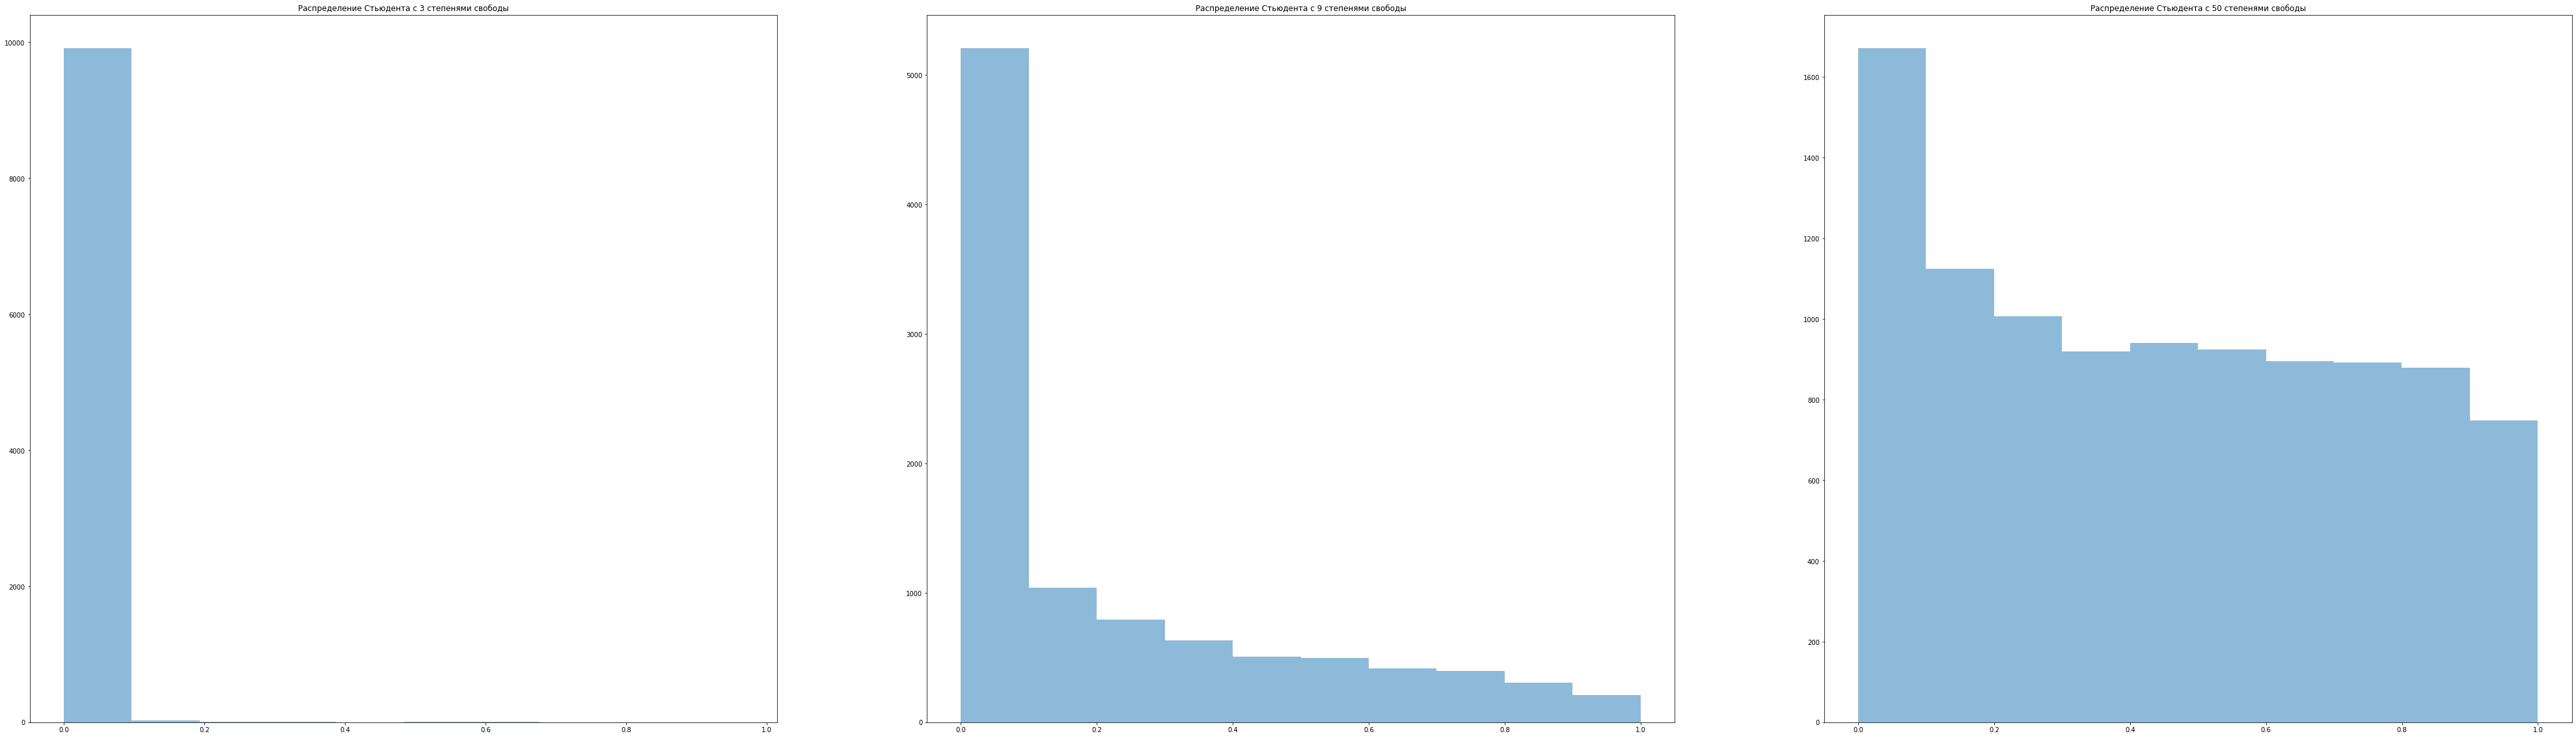

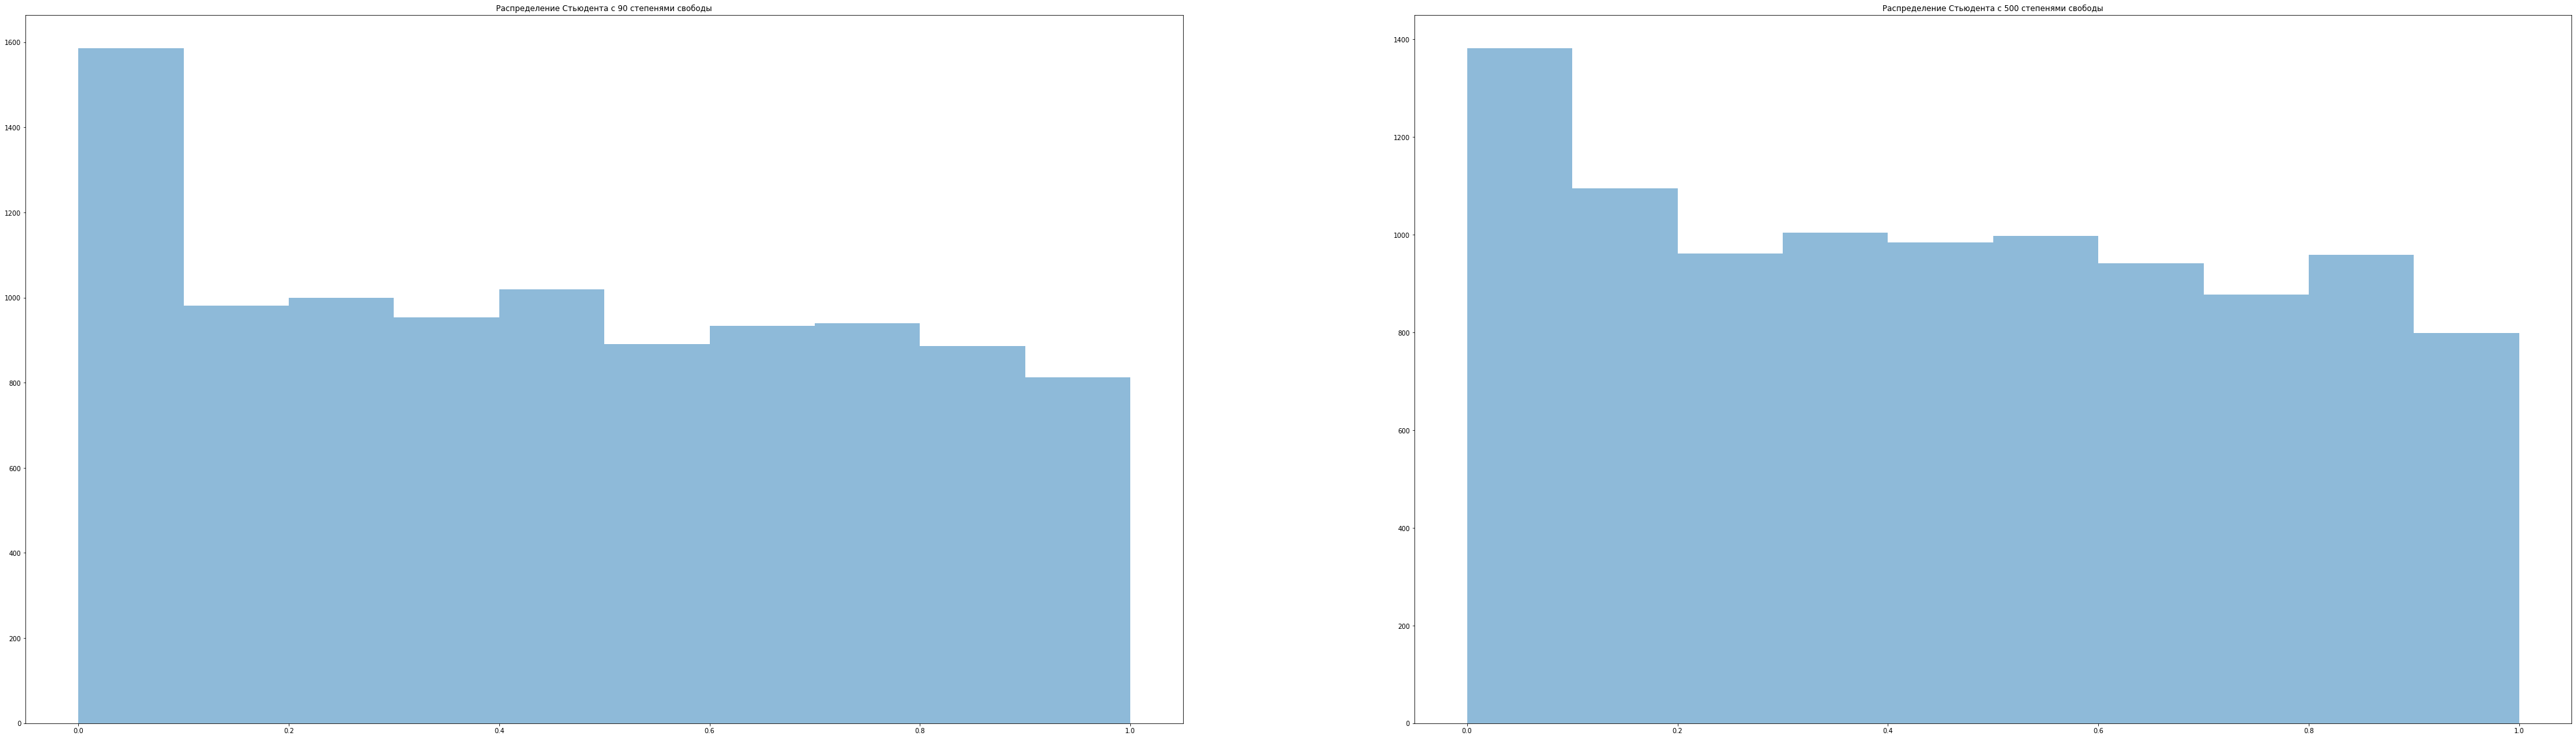

In [18]:
# подготовка библиотек 
from math import sqrt, log, log2, isnan
import scipy.stats as sts
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(70, 20))
n = 250
for l, k in enumerate([3, 9, 50]):
    pvalue = []
    n = 250
    for _ in range(10000):
        # генерируем выборку нужного объема распределения Стьюдента
        Data = sts.t(k).rvs(n)
        # данный кусок кода поясняется выше 
        m = 1+int(log2(n))  # формула Стерджесса
        h = (max(Data)-min(Data))/m
        func = ozenka_tetta(Data)
        m, sigma, eps, V = func[0], func[1], func[3], func[2]
        Exp = sts.norm(m, sqrt(sigma))
        P = [Exp.cdf(eps[0]+0.5*h)]
        P += [Exp.cdf(eps[x]+0.5*h)-Exp.cdf(eps[x]-0.5*h)
              for x in range(1, len(eps)-1)]
        P += [1-Exp.cdf(eps[-1]-0.5*h)]

        Z = []
        for i in range(len(P)):
            Z.append(((V[i]-n*P[i])**2)/(n*P[i]))
        chi_2 = sum(Z)

        pvalue.append(sts.chi2(len(V)-3).sf(chi_2))

    ax[l].hist(pvalue, alpha=0.5)
    ax[l].set_title(f'Распределение Стьюдента с {k} степенями свободы')
plt.savefig(".\\ResultWork\\Student's_raspr_1.png")

#аналогичный код с другими значениями
fig, ax = plt.subplots(1, 2, figsize=(70, 20))
n = 250
for l, k in enumerate([ 90, 500]):
    pvalue = []
    n = 250
    for _ in range(10000):

        Data = sts.t(k).rvs(n)
        m = 1+int(log2(n))  # формула Стерджесса
        h = (max(Data)-min(Data))/m
        func = ozenka_tetta(Data)
        m, sigma, eps, V = func[0], func[1], func[3], func[2]
        Exp = sts.norm(m, sqrt(sigma))
        P = [Exp.cdf(eps[0]+0.5*h)]
        P += [Exp.cdf(eps[x]+0.5*h)-Exp.cdf(eps[x]-0.5*h)
              for x in range(1, len(eps)-1)]
        P += [1-Exp.cdf(eps[-1]-0.5*h)]

        Z = []
        for i in range(len(P)):
            Z.append(((V[i]-n*P[i])**2)/(n*P[i]))
        chi_2 = sum(Z)

        pvalue.append(sts.chi2(len(V)-3).sf(chi_2))

    ax[l].hist(pvalue, alpha=0.5)
    ax[l].set_title(f'Распределение Стьюдента с {k} степенями свободы')
plt.savefig(".\\ResultWork\\Student's_raspr_2.png")

## Код 07. Реальные данные и равномерность.ipynb (Таблица 11, 12, Рисунок 6, 7)

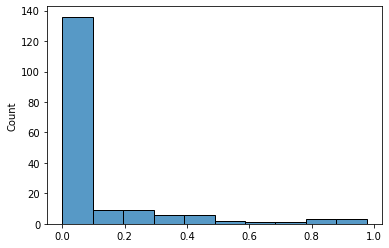

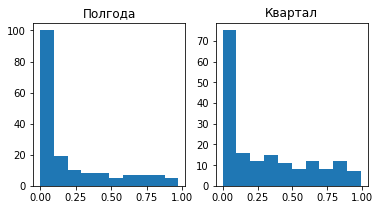

In [19]:
# подготовка библиотек 
from math import sqrt, log, log2, isnan
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd

def Pirsons(file, year=False, half=False, quart=False):
    # высчитываем объем выборки при помощи функции Num_of_days (см.выше)
    n = Num_of_days(file, year, half, quart)
    df = pd.read_csv(file)
    start, end = Rows(file, year, half, quart)
    # формируем список лог доходностей определенного периода и акции
    Data = np.log(df['Close']/df['Open'])[start:end]
    # данный кусок кода поясняется выше 
    m = 1+int(log2(n))  # формула Стерджесса
    h = (max(Data)-min(Data))/m
    func = ozenka_tetta(Data)
    m, sigma, eps, V = func[0], func[1], func[3], func[2]
    Exp = sts.norm(m, sqrt(sigma))
    P = [Exp.cdf(eps[0]+0.5*h)]
    P += [Exp.cdf(eps[x]+0.5*h)-Exp.cdf(eps[x]-0.5*h) for x in range(1, len(eps)-1)]
    P += [1-Exp.cdf(eps[-1]-0.5*h)]

    Z = []
    for i in range(len(P)):
        Z.append(((V[i]-n*P[i])**2)/(n*P[i]))
    chi_2 = sum(Z)
    pvalue = (sts.chi2(len(V)-3).sf(chi_2))

    return chi_2, round(pvalue, 3)

years = range(2010, 2021)
df = pd.DataFrame(columns=years)
TICK = ['AAPL', 'AMZN', 'CSCO', 'INTC', 'MCD', 'NKE', 'FDX',
        'PG', 'V', 'DIS', 'GOOG', 'NFLX', 'MSFT', 'IBM', 'KO', 'PFE']
pvalue_pirs=[] # список p-value критерия Пирсона на реальных данных
for j in TICK:
    file = f'.\\ТИКЕРЫ\\{j}.csv'
    l = []
    for i in years:
        l.append(Pirsons(file, year = i)[1]) 
    df.loc[j] = l # заполняем таблицу
    pvalue_pirs += l
# сохраняем таблицу и гистограмму в файлы
df.to_csv(f'.\\ResultWork\\Real_data_year.csv', sep=';')
sns.histplot(pvalue_pirs,bins=10)
plt.savefig(".\\ResultWork\\Real_data.png")

""" аналогично для других периодов """
pvalue_half = []
pvalue_quart = []
year = range(2010, 2021)
TICK = ['AAPL', 'AMZN', 'CSCO', 'INTC', 'MCD', 'NKE', 'FDX',
        'PG', 'V', 'DIS', 'GOOG', 'NFLX', 'MSFT', 'IBM', 'KO', 'PFE']
for j in TICK:
    file = f'.\\ТИКЕРЫ\\{j}.csv'
    l, k = [], []
    for i in year:
        l.append(Pirsons(file, i, half=2)[1])
        k.append(Pirsons(file, i, quart=1)[1])
    pvalue_half += l
    pvalue_quart += k

    
fig, ax = plt.subplots(1, 2, figsize = (6,3))
ax[0].hist(pvalue_half, bins=10)
ax[0].set_title('Полгода')
ax[1].hist(pvalue_quart, bins=10)
ax[1].set_title('Квартал')

plt.savefig(f".\\ResultWork\\Real_data_for_different_periods.png")

#высчитывание доли проверок для которых гипотеза принималась
pv001, pv005, pv010 = 0, 0, 0
pv = pd.DataFrame(columns=['1%','5%','10%'])
for j in range(len(TICK)):
    for i in range(len(years)):
        if df.iloc[j,i]>0.01:
            pv001 = pv001+1 
        if df.iloc[j,i]>0.05: 
            pv005 = pv005+1 
        if df.iloc[j,i]>0.1: 
            pv010 = pv010+1
percent = [round(pv001/len(TICK)/len(years),3),round(pv005/len(TICK)/len(years),3),round(pv010/len(TICK)/len(years),3)]
pv.loc[0] = percent
pv.to_csv(f'.\\ResultWork\\Real_data_percent.csv', sep=';',index=False)

## Код 08. Реальные данные при разных объемах торгов и равномерность.ipynb (Рисунок 8, 9, 10, 11)

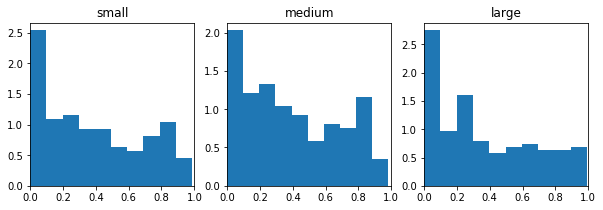

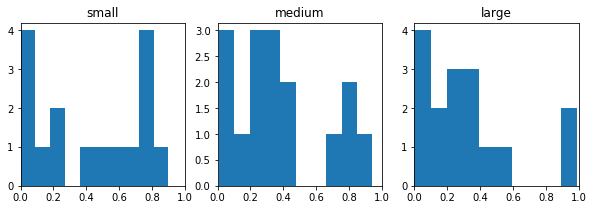

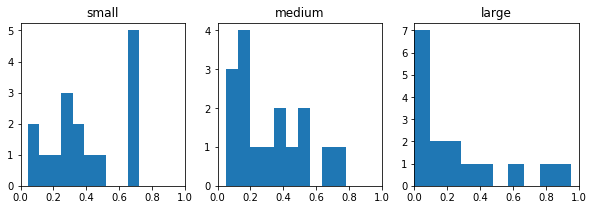

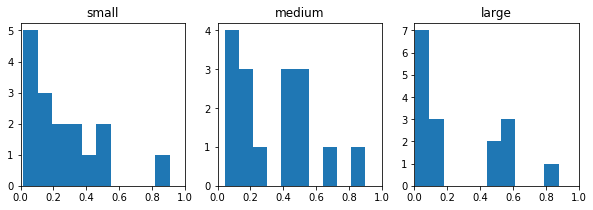

In [20]:
# подготовка библиотек 
from math import sqrt, log, log2, isnan
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd

def Volumes(file, year = False, half = False, quart = False):
    # считывание данных из csv файла в таблицу
    df = pd.read_csv(file)
    # получение позиций среза с помощью функции Rows (см. выше) 
    start, end = Rows(file, year = year, half = half, quart = quart)
    # формируем столбец новой цены и новой объема продаж, высчитываем лог доходность также в новых столбец
    df['new_price'] = (df['Adj Close'] + df['Open']) / 2
    df['new_vol'] = df['new_price'] * df['Volume']
    df['log'] = np.log(df['Close'] / df['new_price'])
    return df.loc[start:end]


def Pirsons(file, size,  year = False, half = False, quart = False):
    # получаем таблицу при помощи функции Volumes
    df = Volumes(file, year = year,  half = half, quart = quart)
    df.index = range(df.shape[0])
    # находим квантили 1/3 и 2/3 уровней в столбце нового объема продаж
    quant = np.quantile(df['new_vol'], np.arange(0, 1, 1/3)[1:])
    Data = []
    # разбиваю данные в соответсвии с нужным параметром (какой объем нужен)
    if size == 1:
        for i in range(df.shape[0]):
            if df.at[i,"new_vol"] <= quant[size - 1]:
                Data.append(df.at[i,'log'])
    elif size == 2:
        for i in range(df.shape[0]):
            if quant[size - 2] < df.at[i,"new_vol"] <= quant[size - 1]:
                Data.append(df.at[i,'log'])
    else:
        for i in range(df.shape[0]):
            if df.at[i,"new_vol"] > quant[size - 2]:
                Data.append(df.at[i,'log'])
                
    # данный кусок кода поясняется выше 
    n = len(Data)
    m = 1+int(log2(n))  # формула Стерджесса
    h = (max(Data)-min(Data))/m
    func = ozenka_tetta(Data)
    m, sigma, eps, V = func[0], func[1], func[3], func[2]
    Exp = sts.norm(m, sqrt(sigma))
    P = [Exp.cdf(eps[0]+0.5*h)]
    P += [Exp.cdf(eps[x]+0.5*h)-Exp.cdf(eps[x]-0.5*h) for x in range(1, len(eps)-1)]
    P += [1-Exp.cdf(eps[-1]-0.5*h)]

    Z = []
    for i in range(len(P)):
        Z.append(((V[i]-n*P[i])**2)/(n*P[i]))
    chi_2 = sum(Z)
    pvalue = (sts.chi2(len(V)-3).sf(chi_2))
    return chi_2, round(pvalue, 3)

pvalue = [] # список p-value
sizes = {'small': 1,'medium': 2,'large': 3} # соответсвие объема продаж параметру для функции
years = range(2010, 2021)
year = 2016
TICK = ['AAPL', 'AMZN', 'CSCO', 'INTC', 'MCD', 'NKE', 'FDX',
        'PG', 'V', 'DIS', 'GOOG', 'NFLX', 'MSFT', 'IBM', 'KO', 'PFE']
l1, l2, l3 = [], [], [] # списки p-value для разных объемов продаж
for j in TICK:
    file = f'.\\ТИКЕРЫ\\{j}.csv'
    
    for k in years:
        
        l1.append(Pirsons(file, 1, year = k, half = False, quart = False)[1])
        l2.append(Pirsons(file, 2, year = k, half = False, quart = False)[1])
        l3.append(Pirsons(file, 3, year = k, half = False, quart = False)[1])
        
    pvalue += l1+l2+l3

# создание гистограмм 
fig,ax = plt.subplots(1,3,figsize=(10,3))
size=list(sizes.keys())
ax[0].hist(l1,density=True)
ax[0].set_xlim(0,1)
ax[0].set_title(size[0])

ax[1].hist(l2,density=True)
ax[1].set_xlim(0,1)
ax[1].set_title(size[1])

ax[2].hist(l3,density=True)
ax[2].set_xlim(0,1)
ax[2].set_title(size[2])

plt.savefig(f".\\ResultWork\\Volume_for_years.png")

# аналогичный код для других гистограмм
pvalue = []
sizes = {'small': 1,'medium': 2,'large': 3}
years = range(2010, 2021)
year = 2016
df = pd.DataFrame(columns = sizes.keys())
TICK = ['AAPL', 'AMZN', 'CSCO', 'INTC', 'MCD', 'NKE', 'FDX',
        'PG', 'V', 'DIS', 'GOOG', 'NFLX', 'MSFT', 'IBM', 'KO', 'PFE']
for j in TICK:
    file = f'.\\ТИКЕРЫ\\{j}.csv'
    l = []
    for i in sizes.values():
        l.append(Pirsons(file, i, year = year, half = False, quart = False)[1])
        
    df.loc[j] = l
    pvalue += l

    
fig,ax = plt.subplots(1,3,figsize=(10,3))
size=list(sizes.keys())
for i in range(3):
    ax[i].hist(df[size[i]],bins=10)
    ax[i].set_xlim(0,1)
    ax[i].set_title(size[i])
plt.savefig(f".\\ResultWork\\Volume_for_{year}.png")

pvalue = []
sizes = {'small': 1,'medium': 2,'large': 3}
years = range(2010, 2021)
year = 2016
df = pd.DataFrame(columns = sizes.keys())
TICK = ['AAPL', 'AMZN', 'CSCO', 'INTC', 'MCD', 'NKE', 'FDX',
        'PG', 'V', 'DIS', 'GOOG', 'NFLX', 'MSFT', 'IBM', 'KO', 'PFE']
for j in TICK:
    file = f'.\\ТИКЕРЫ\\{j}.csv'
    l = []
    for i in sizes.values():
        l.append(Pirsons(file, i, year = year, half = 2, quart = False)[1])
        
    df.loc[j] = l
    pvalue += l

    
fig,ax = plt.subplots(1,3,figsize=(10,3))
size=list(sizes.keys())
for i in range(3):
    ax[i].hist(df[size[i]],bins=10)
    ax[i].set_xlim(0,1)
    ax[i].set_title(size[i])
plt.savefig(f".\\ResultWork\\Volume_for_second_half_of_{year}.png")

pvalue = []
sizes = {'small': 1,'medium': 2,'large': 3}
years = range(2010, 2021)
year = 2016
df = pd.DataFrame(columns = sizes.keys())
TICK = ['AAPL', 'AMZN', 'CSCO', 'INTC', 'MCD', 'NKE', 'FDX',
        'PG', 'V', 'DIS', 'GOOG', 'NFLX', 'MSFT', 'IBM', 'KO', 'PFE']
for j in TICK:
    file = f'.\\ТИКЕРЫ\\{j}.csv'
    l = []
    for i in sizes.values():
        l.append(Pirsons(file, i, year = year, half = False, quart = 4)[1])
        
    df.loc[j] = l
    pvalue += l

    
fig,ax = plt.subplots(1,3,figsize=(10,3))
size=list(sizes.keys())
for i in range(3):
    ax[i].hist(df[size[i]])
    ax[i].set_xlim(0,1)
    ax[i].set_title(size[i])

plt.savefig(f".\\ResultWork\\Volume_for_fourth_quartal_of_{year}.png")

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


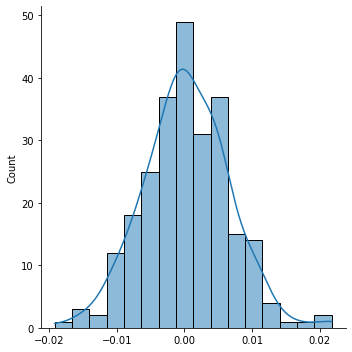

In [27]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def Profit(file,year,half_year=False,quart=False,five=False):
    df = pd.read_csv(file)
    start,end=Rows(file,year,half_year,quart=five)
    return np.log(df['Close']/df['Open'])[start:end]
stock1='PG'
year1=2014

stock2='IBM'
year2=2015
quart2=4

file1=f'.\\ТИКЕРЫ\\{stock1}.csv'

#fig,ax=plt.subplots(figsize=(8,8))
price1=Profit(file1,year=year1)

#ax.hist(price,bins=20)
sns.displot(price1,ax=ax,kde=True)

plt.savefig(f'.\\{stock1}_in_{year1}.png')
plt.show()